# Trabalho prático: teste vocacional na área de dados

##### ***Feito por: Daniel Diniz***

## Importação das bibliotecas básicas

- Instalação de todos as bibliotecas que são necessárias para a análise dos dados

In [1]:
!pip -q install plotly


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip -q install pandas
!pip -q install openpyxl 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip -q install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip -q install nbformat


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Base de dados 

- Fonte: https://bit.ly/facomp-sods

## Exploração dos dados

- Nessa etapa, busca-se fazer a leitura da base de dados e extrair inconsistências ou valores faltantes de cada atributo (alvo e previsor)

In [6]:
base_cargo = pd.read_excel('IA_trabalho_final/sods.xlsx')

In [7]:
base_cargo

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,32.0,Masculino,Parda,Não,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,26.0,Masculino,Branca,Não,True,São Paulo (SP),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, Oracle, MariaDB, HBase, MySQL",Não sei opinar,Analista de Dados/Data Analyst
4267,30.0,Feminino,Branca,Não,True,Minas Gerais (MG),Mestrado,Outras Engenharias,de 1 a 2 anos,Python,"SQL SERVER, SAP HANA",Azure (Microsoft),Engenheiro de Dados/Arquiteto de Dados/Data En...
4268,29.0,Masculino,Branca,Não,True,São Paulo (SP),Mestrado,Outras Engenharias,de 4 a 6 anos,NaN,NaN,NaN,NaN
4269,NaN,Masculino,Branca,Não,True,São Paulo (SP),Não tenho graduação formal,NaN,Menos de 1 ano,Python,"Microsoft Access, Oracle",Azure (Microsoft),Outra Opção


In [8]:
base_cargo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    4197 non-null   float64
 1   genero                   4262 non-null   object 
 2   etnia                    4271 non-null   object 
 3   pcd                      4271 non-null   object 
 4   vive_no_brasil           4271 non-null   bool   
 5   estado_moradia           4156 non-null   object 
 6   nivel_ensino             4271 non-null   object 
 7   formacao                 4149 non-null   object 
 8   tempo_experiencia_dados  3694 non-null   object 
 9   linguagens_preferidas    2979 non-null   object 
 10  bancos_de_dados          2978 non-null   object 
 11  cloud_preferida          2981 non-null   object 
 12  cargo                    2981 non-null   object 
dtypes: bool(1), float64(1), object(11)
memory usage: 404.7+ KB


In [9]:
base_cargo.describe()

,idade
count,4197.000000
mean,31.169168
std,6.902803
min,18.000000
25%,26.000000
50%,30.000000
75%,35.000000
max,54.000000


In [10]:
base_cargo['cargo'].describe()

count                               2981
unique                                18
top       Analista de Dados/Data Analyst
freq                                 639
Name: cargo, dtype: object

In [11]:
base_cargo['cargo'].unique()

array(['DBA/Administrador de Banco de Dados', nan,
       'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas',
       'Cientista de Dados/Data Scientist', 'Professor',
       'Analista de BI/BI Analyst',
       'Analista de Inteligência de Mercado/Market Intelligence',
       'Analista de Negócios/Business Analyst',
       'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
       'Analista de Dados/Data Analyst',
       'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)',
       'Outra Opção', 'Analista de Suporte/Analista Técnico',
       'Engenheiro de Machine Learning/ML Engineer', 'Analytics Engineer',
       'Analista de Marketing', 'Outras Engenharias (não inclui dev)',
       'Estatístico', 'Economista'], dtype=object)

In [12]:
base_cargo['pcd'].describe()

count     4271
unique       3
top        Não
freq      4198
Name: pcd, dtype: object

In [13]:
base_cargo['estado_moradia'].describe()

count               4156
unique                22
top       São Paulo (SP)
freq                1745
Name: estado_moradia, dtype: object

In [14]:
base_cargo['estado_moradia'].unique()

array(['Distrito Federal (DF)', 'Pará (PA)', 'Minas Gerais (MG)',
       'Ceará (CE)', 'São Paulo (SP)', 'Rio Grande do Sul (RS)',
       'Bahia (BA)', 'Rio de Janeiro (RJ)', 'Mato Grosso do Sul (MS)',
       'Paraíba (PB)', 'Mato Grosso (MT)', 'Paraná (PR)',
       'Espírito Santo (ES)', nan, 'Santa Catarina (SC)',
       'Pernambuco (PE)', 'Rio Grande do Norte (RN)', 'Sergipe (SE)',
       'Alagoas (AL)', 'Goiás (GO)', 'Maranhão (MA)', 'Amazonas (AM)',
       'Piauí (PI)'], dtype=object)

In [15]:
base_cargo['formacao'].describe()

count                                                  4149
unique                                                    9
top       Computação / Engenharia de Software / Sistemas...
freq                                                   1543
Name: formacao, dtype: object

In [16]:
base_cargo['formacao'].unique()

array(['Computação / Engenharia de Software / Sistemas de Informação/ TI',
       'Outras Engenharias',
       'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais',
       'Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde',
       'Ciências Sociais',
       'Economia/ Administração / Contabilidade / Finanças/ Negócios',
       'Marketing / Publicidade / Comunicação / Jornalismo', nan,
       'Química / Física', 'Outra opção'], dtype=object)

In [17]:
base_cargo['tempo_experiencia_dados'].describe()

count              3694
unique                7
top       de 1 a 2 anos
freq                980
Name: tempo_experiencia_dados, dtype: object

In [18]:
base_cargo['tempo_experiencia_dados'].unique()

array(['de 1 a 2 anos', 'de 3 a 4 anos', 'de 4 a 6 anos',
       'Não tenho experiência na área de dados', 'Menos de 1 ano',
       'Mais de 10 anos', nan, 'de 7 a 10 anos'], dtype=object)

In [19]:
base_cargo['linguagens_preferidas'].describe()

count       2979
unique        36
top       Python
freq        2581
Name: linguagens_preferidas, dtype: object

In [20]:
base_cargo['linguagens_preferidas'].unique() # Tratar valores inconsistentes/duplicatas

array(['R', nan, 'Python', 'SQL', 'Julia', 'Clojure', 'C/C++/C#',
       'PySpark', 'Aql', 'Scala', 'Go', 'M Language', 'NÃO SEI', 'Spark',
       'M', 'Sql', 'xlsx', 'Rust', 'Não sei', 'Elixir', 'sql', 'VBA',
       'Não utilizo', 'Dax', 'javascript',
       'Softwares estatísticos como spss', 'Nenhuma', 'Java', 'Excel',
       'java', 'Nao atuo com programação', 'Nenhum', 'Não uso',
       'SQL Postegres', 'spark', 'Sas', 'KQL'], dtype=object)

In [21]:
base_cargo['cloud_preferida'].describe()

count                          2981
unique                            5
top       Amazon Web Services (AWS)
freq                           1153
Name: cloud_preferida, dtype: object

In [22]:
base_cargo['vive_no_brasil'].describe()

count     4271
unique       2
top       True
freq      4171
Name: vive_no_brasil, dtype: object

In [23]:
base_cargo['etnia'].describe()

count       4271
unique         7
top       Branca
freq        2744
Name: etnia, dtype: object

In [24]:
base_cargo['nivel_ensino'].describe()

count                      4271
unique                        7
top       Graduação/Bacharelado
freq                       1510
Name: nivel_ensino, dtype: object

In [25]:
base_cargo['nivel_ensino'].unique()

array(['Pós-graduação', 'Graduação/Bacharelado', 'Doutorado ou Phd',
       'Estudante de Graduação', 'Mestrado', 'Não tenho graduação formal',
       'Prefiro não informar'], dtype=object)

In [26]:
base_cargo['bancos_de_dados'].describe()

count                2978
unique               1473
top       Google BigQuery
freq                  227
Name: bancos_de_dados, dtype: object

In [27]:
base_cargo['bancos_de_dados'] # Tratar dados, possui muitas inconsistências

0           PostgreSQL, Oracle, MySQL, SQL SERVER
1                                             NaN
2                  PostgreSQL, MySQL, Oracle, DB2
3                                 Google BigQuery
4                                Microsoft Access
                          ...                    
4266    PostgreSQL, Oracle, MariaDB, HBase, MySQL
4267                         SQL SERVER, SAP HANA
4268                                          NaN
4269                     Microsoft Access, Oracle
4270                 Oracle, Firebird, SQL SERVER
Name: bancos_de_dados, Length: 4271, dtype: object

In [28]:
base_cargo['bancos_de_dados'].unique()

array(['PostgreSQL, Oracle, MySQL, SQL SERVER', nan,
       'PostgreSQL, MySQL, Oracle, DB2', ...,
       'Google BigQuery, PostgreSQL, MySQL',
       'PostgreSQL, Oracle, MariaDB, HBase, MySQL',
       'Oracle, Firebird, SQL SERVER'], dtype=object)

In [29]:
base_cargo[base_cargo['idade'] <= 0] # Nenhum valor inconsistente de idade

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo


In [30]:
base_cargo.isnull() # Revela qual atributo recebeu nulo ou nao nulo

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,False,False,False,False,False,False,False,False,False,False,False,False,False
4267,False,False,False,False,False,False,False,False,False,False,False,False,False
4268,False,False,False,False,False,False,False,False,False,True,True,True,True
4269,True,False,False,False,False,False,False,True,False,False,False,False,False


In [31]:
base_cargo.isnull().sum() # Contagem de valores nulos por coluna de atributo

idade                        74
genero                        9
etnia                         0
pcd                           0
vive_no_brasil                0
estado_moradia              115
nivel_ensino                  0
formacao                    122
tempo_experiencia_dados     577
linguagens_preferidas      1292
bancos_de_dados            1293
cloud_preferida            1290
cargo                      1290
dtype: int64

## Visualização dos dados

- Alguns atributos como 'vive_no_brasil' e 'bancos_de_dado' não foram plotados porque estão confusos

- Processo importante para filtrar os dados e selecionar apenas o que interessa para a análise

<Axes: xlabel='count', ylabel='cargo'>

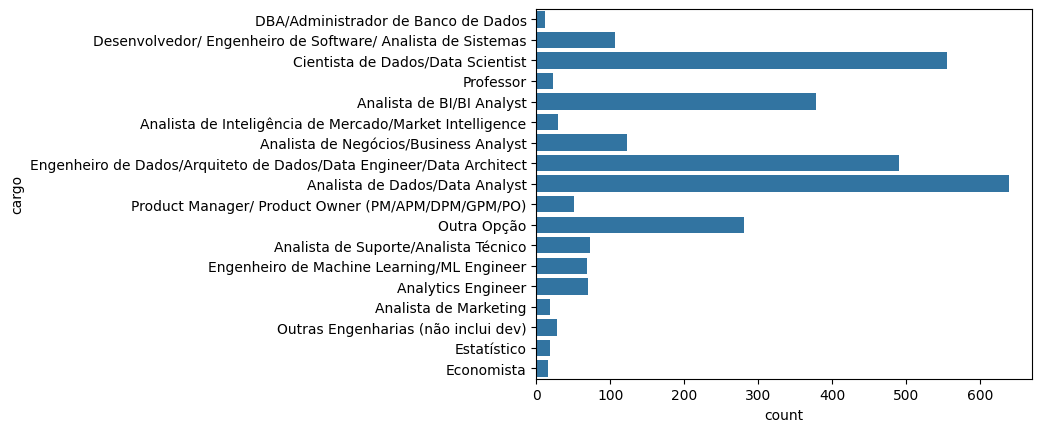

In [32]:
sns.countplot(base_cargo['cargo'])

(array([146., 723., 871., 979., 514., 453., 235., 114., 107.,  55.]),
 array([18. , 21.6, 25.2, 28.8, 32.4, 36. , 39.6, 43.2, 46.8, 50.4, 54. ]),
 <BarContainer object of 10 artists>)

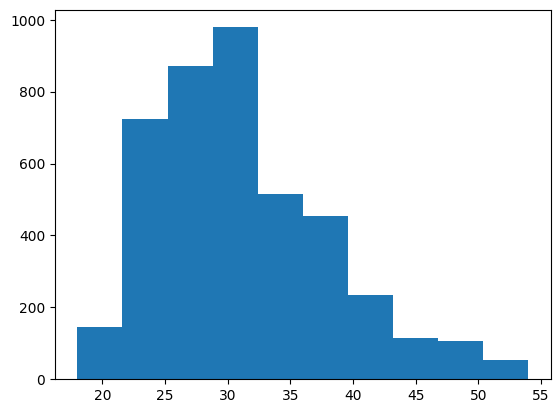

In [33]:
plt.hist(base_cargo['idade'])

<Axes: xlabel='count', ylabel='genero'>

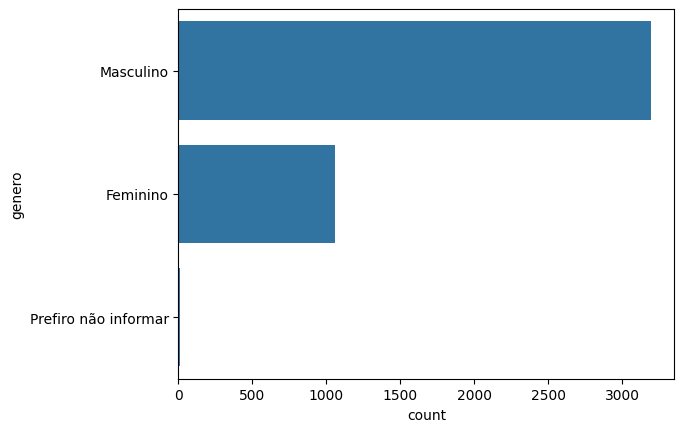

In [34]:
sns.countplot(base_cargo['genero'])

<Axes: xlabel='count', ylabel='pcd'>

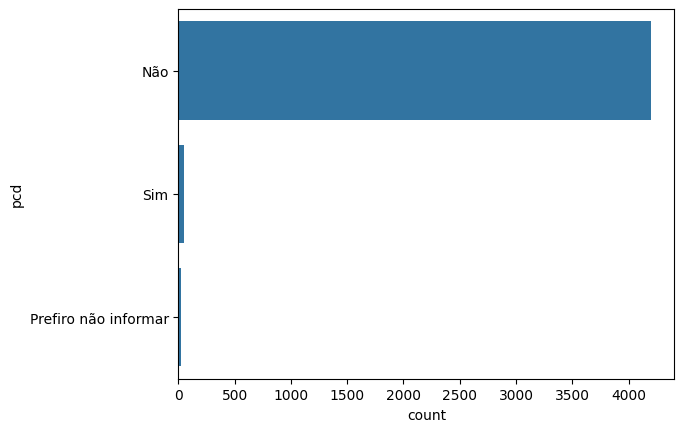

In [35]:
sns.countplot(base_cargo['pcd'])

<Axes: xlabel='count', ylabel='formacao'>

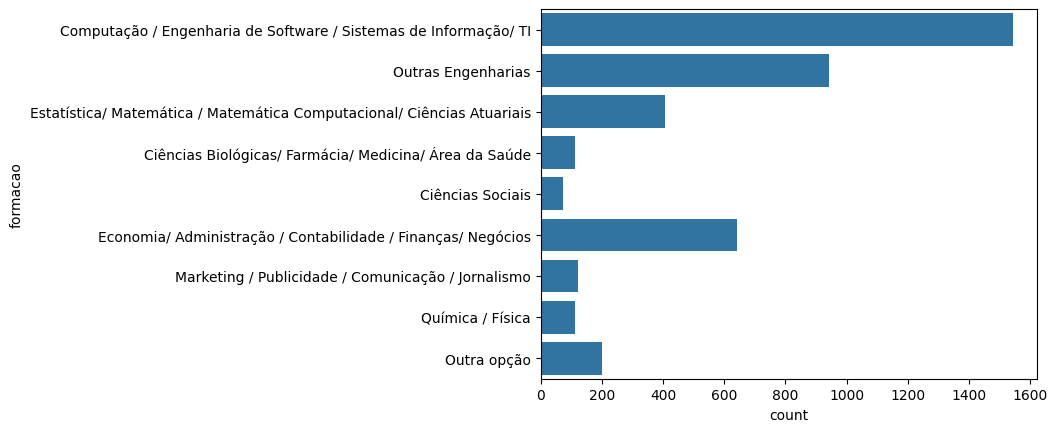

In [36]:
sns.countplot(base_cargo['formacao'])

<Axes: xlabel='count', ylabel='etnia'>

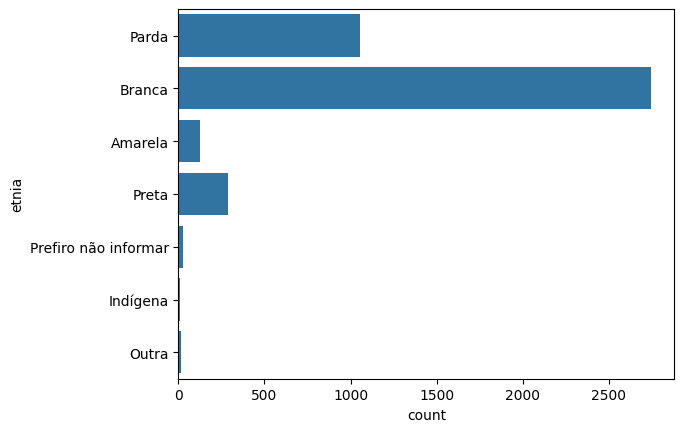

In [37]:
sns.countplot(base_cargo['etnia'])

<Axes: xlabel='count', ylabel='estado_moradia'>

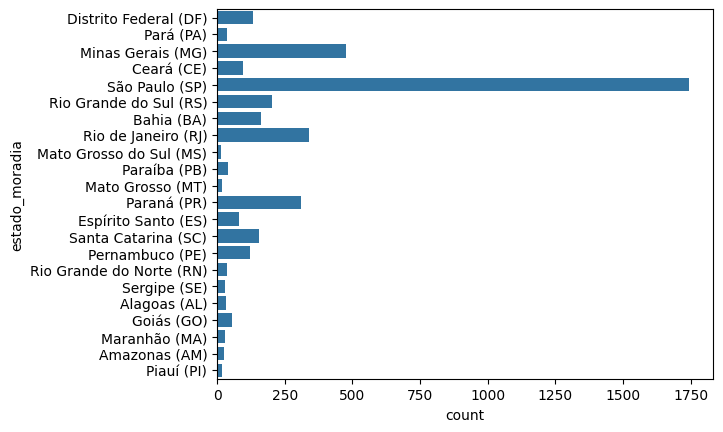

In [38]:
sns.countplot(base_cargo['estado_moradia'])

<Axes: xlabel='count', ylabel='tempo_experiencia_dados'>

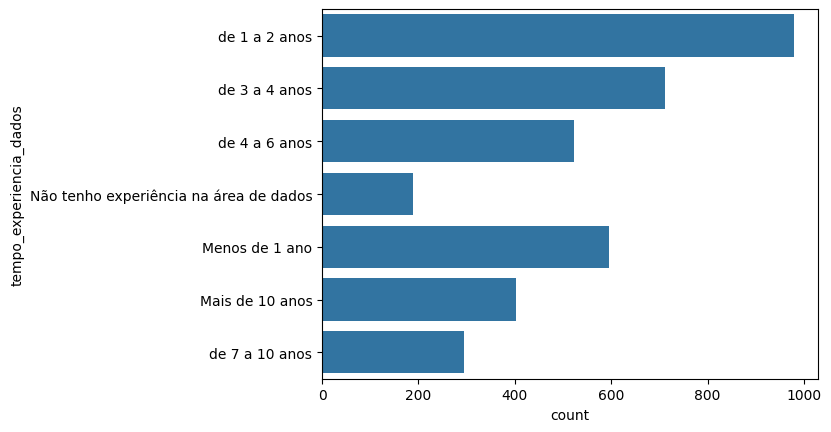

In [39]:
sns.countplot(base_cargo['tempo_experiencia_dados'])

<Axes: xlabel='count', ylabel='nivel_ensino'>

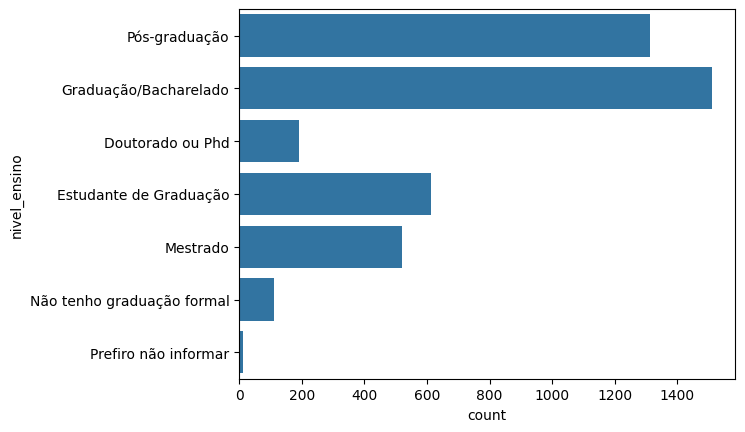

In [40]:
sns.countplot(base_cargo['nivel_ensino'])

<Axes: xlabel='count', ylabel='linguagens_preferidas'>

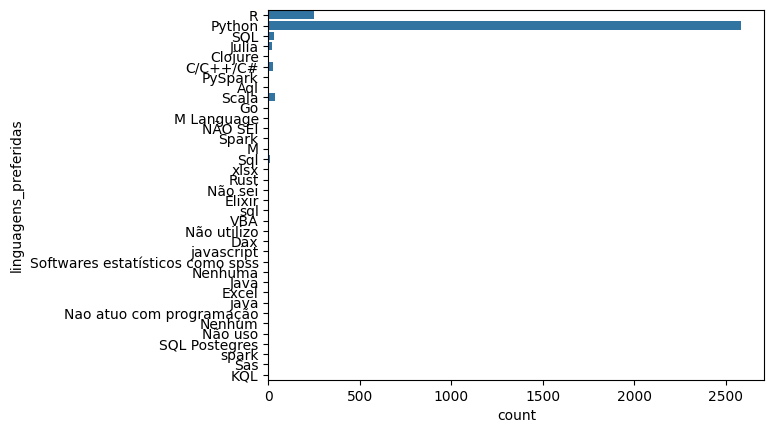

In [41]:
sns.countplot(base_cargo['linguagens_preferidas'])

<Axes: xlabel='count', ylabel='cloud_preferida'>

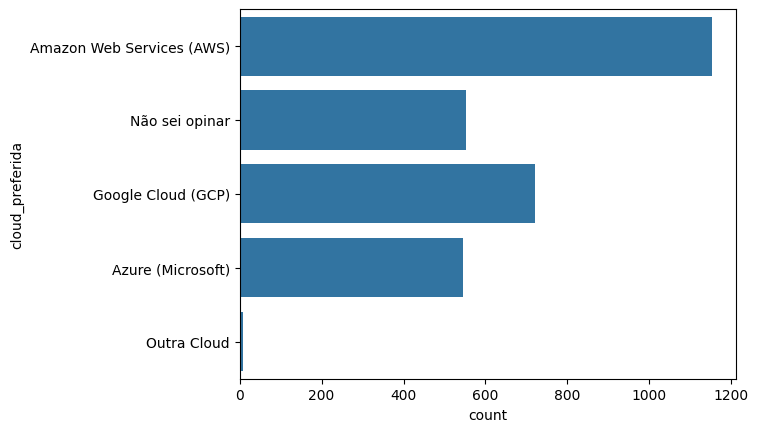

In [42]:
sns.countplot(base_cargo['cloud_preferida'])

### Analisando relação entre o atributo alvo (cargo) e alguns previsores

In [43]:
grafico = px.scatter_matrix(base_cargo, dimensions=['idade', 'genero'], color='cargo')
grafico.show()

In [44]:
grafico = px.scatter_matrix(base_cargo, dimensions=['idade', 'nivel_ensino'], color='cargo')
grafico.show()

In [45]:
grafico = px.scatter_matrix(base_cargo, dimensions=['genero', 'etnia'], color='cargo')
grafico.show()

In [46]:
grafico = px.scatter_matrix(base_cargo, dimensions=['pcd', 'nivel_ensino'], color='cargo')
grafico.show()

In [47]:
grafico = px.scatter_matrix(base_cargo, dimensions=['pcd', 'idade'], color='cargo')
grafico.show()

In [48]:
grafico = px.scatter_matrix(base_cargo, dimensions=['vive_no_brasil', 'estado_moradia'], color='cargo')
grafico.show()

## Tratamento dos dados

- Nessa etapa, após a visualização dos dados, vamos tratar os dados que forem inconsistentes ou estiverem faltando

- Para esse processo, foi selecionado apenas o que interessa para a análise do cargo ideal. Então por isso que foram descartadas as colunas **etnia** e **genero**. Já para as colunas **pcd** e **vive_no_brasil**, foram descartadas porque possuem valores majoritariamente com um valor. Ainda falando sobre **vive_no_brasil**, o fato de que o atributo **estado_moradia** mostra que não há nenhuma entrada com valor diferente de um estado do Brasil justifica também a sua retirada. Por último, o atributo **bancos_de_dados** será tratado de forma diferente: ele será retirado porém seus valores virarão atributos novos (colunas). O restante vai ser tratado e, por conseguinte, utilizado para a análise

In [49]:
# Identifica todos os faltantes
base_cargo.isnull().sum()

idade                        74
genero                        9
etnia                         0
pcd                           0
vive_no_brasil                0
estado_moradia              115
nivel_ensino                  0
formacao                    122
tempo_experiencia_dados     577
linguagens_preferidas      1292
bancos_de_dados            1293
cloud_preferida            1290
cargo                      1290
dtype: int64

In [50]:
# Removendo os atributos (colunas)
base_cargo.drop(['etnia'], axis=1, inplace=True) # não interessa para a análise
base_cargo.drop(['pcd'], axis=1, inplace=True) # atributo majoritariamente "Não"
base_cargo.drop(['vive_no_brasil'], axis=1, inplace=True) # atributo majoritariamente "True"
base_cargo.drop(['genero'], axis=1, inplace=True) # não interessa para a analise

In [51]:
# Preenche o restante com a moda do atributo idade
moda_idade = base_cargo['idade'].mode()[0]
base_cargo['idade'] = base_cargo['idade'].fillna(moda_idade)

# Preenche o restante com a moda do atributo estado_moradia
moda_estado_moradia = base_cargo['estado_moradia'].mode()[0]
base_cargo['estado_moradia'] = base_cargo['estado_moradia'].fillna(moda_estado_moradia)

# Preenche o restante com a moda do atributo formacao
moda_formacao = base_cargo['formacao'].mode()[0]
base_cargo['formacao'] = base_cargo['formacao'].fillna(moda_formacao)

# Preenche o restante com a moda do atributo tempo_experiencia_dados
moda_tempo = base_cargo['tempo_experiencia_dados'].mode()[0]
base_cargo['tempo_experiencia_dados'] = base_cargo['tempo_experiencia_dados'].fillna(moda_tempo)

# Mapeamento para a coluna 'tempo_experiencia_dados'
# Transformando os valores para numeros inteiros para facilitar a modelagem
mapeamento_tempo_experiencia = {
    'Não tenho experiência na área de dados': 0,
    'Menos de 1 ano': 1,
    'de 1 a 2 anos': 2,
    'de 3 a 4 anos': 3,
    'de 4 a 6 anos': 5,
    'de 7 a 10 anos': 8,
    'Mais de 10 anos': 11
}

base_cargo['tempo_experiencia_dados'] = base_cargo['tempo_experiencia_dados'].map(mapeamento_tempo_experiencia)

# Preenche o restante com a moda do atributo cloud_preferida
moda_cloud = base_cargo['cloud_preferida'].mode()[0]
base_cargo['cloud_preferida'] = base_cargo['cloud_preferida'].fillna(moda_cloud)

# Preenche o restante com a moda do atributo cargo
moda_cargo = base_cargo['cargo'].mode()[0]
base_cargo['cargo'] = base_cargo['cargo'].fillna(moda_cargo)

# Preenche o restante com a moda do atributo linguagens_preferidas
moda_linguagens_preferidas = base_cargo['linguagens_preferidas'].mode()[0]
base_cargo['linguagens_preferidas'] = base_cargo['linguagens_preferidas'].fillna(moda_linguagens_preferidas)

# Função para filtrar os dados de linguagens_preferidas
def normalize_data(item):
    item = item.strip().lower()

    if 'não' in item or 'nao' in item or item in ['nenhuma', 'nenhum']:
        return 'não aplicável'
    elif item == 'sql postegres':
        return 'PostgreSQL'
    elif item in ['sql', 'spark']:
        return item.capitalize()
    elif item in ['m', 'm language']:
        return 'M Language'
    elif item == 'java':
        return 'Java'
    else:
        return item.capitalize()

# Aplicando a normalização diretamente na coluna 'linguagens_preferidas'
base_cargo['linguagens_preferidas'] = base_cargo['linguagens_preferidas'].apply(normalize_data)

In [52]:
# Dicionário de mapeamento para padronização de bancos
mapeamento_bancos = {
    'MICROSOFT ACCESS': 'ACCESS',
    'MICROSOFT SQL SERVER': 'SQL SERVER',
    'MS AZURE': 'AZURE',
    'APENAS EXCEL': 'EXCEL',
    'B.O SAP': 'SAP BUSINESS',
    'BIG TABLE': 'BIGTABLE',
    'BIGQUERY': 'GOOGLE BIGQUERY',
    'GOOGLE BIG QUERY': 'GOOGLE BIGQUERY',
    'HANA': 'SAP HANA',
    'MSSQL': 'SQL SERVER',
    'NOSSO BANCO É NO EXCEL': 'EXCEL',
    'SAP': 'SAP BUSINESS',
    'SAS LIBS': 'SAS',
    'LISTA DO SHAREPOINT': 'SHAREPOINT',
    'GCS': 'GOOGLE CLOUD STORAGE',
    'CONSUMO DE APIS COM AZURE FUNCTIONS': 'AZURE',
    'OFFICE': 'EXCEL'
}

# Define valores a serem considerados desconhecidos
valores_desconhecidos = {
    'NENHUMA', 'NONE', 'NSA', 'NÃO TEMOS BD', 'BASE DE DADOS LOCAL', 'BASE INTERNA', 'ESTOU EM TRANSIÇÃO DE CARREIRA', 
    'ND', 'NÃO ATUO AINDA NISSO', 'NÃO ATUO NA ÁREA AINDA', 'NÃO POSSUÍMOS UM BANCO DE DADOS.', 'NÃO UTILUZO', 'NAO USO',
    'NÃO RECONHEÇO NENHUM', 'NÃO SEI', 'NÃO TENHO ACESSO AO BANCO DE DADOS DEVIDO AO COMPLIANCE DA EMPRESA', 'NÃO UTILIZO.',
    'NÃO USAMOS', 'NÃO TRABALHO COM BANCO DIRETAMENTE', 'NÃO TRABALHO COM BASE DE DADOS.', 'NÃO TRABALHO COM DADOS', 
    'NÃO USO', 'NÃO USO BD NO TRABALHO', 'NÃO USO NENHUM', 'NÃO UTILIZAMOS BANCO DE DADOS', 'NÃO UTILIZO', 'OOO', 'NENHUM',
    'NÃO UTILIZO BANCOS DE DADOS.', 'NÃO UTILIZO NENHUM', 'NAO ATUO NA AREA DE TECH NA EMPRESA AINDA', 'NAO UTILIZO'
}

# Define valores a serem considerados outros (sao desconhecidos por conta da limitação de pesquisa)
valores_outros = {
    'NÃO SE APLICA', 'NDA', 'NENHUM ACIMA', 'NENHUM DESSES', 'NENHUM DESTES', 'NENHUM DOS CITADOS ACIMA', 'NENHUM DOS LISTADOS',
    'SOLUÇÃO PROPRIETÁRIA', 'SOMENTE EM CURSOS', 'NENHUMA DAS RESPOSTAS', 'BANCO DE DADOS PRÓPRIO DA EMPRESA', 'FONTES INTERNAS E DE CLIENTES',
    'BASE DE DADOS LOCAL', 'BASE INTERNA', 'DADOS ALTERNATIVOS E DADOS INTERNOS DA EMPRESA', 'DADOS GEOESPACIAIS', 'DADOS INTERNOS', 
    'DADOS NÃO ESTRUTURADOS', 'DADOS PÚBLICOS EXTERNOS', 'DIVERSAS FONTES DE MARKETING DIGITAL', 'FONTES DA EMPRESA EM HTML OU CSV',
    'PESQUISAS EMPÍRICA QUE EU COLETO OS DADOS', 'BASES EXCEL E CSV EXTRAÍDAS DIRETO NO SITE'
}

def normalize_bancos(bancos):
    # Verifica se a entrada é uma string e, se for, a divide em uma lista de bancos
    if isinstance(bancos, str):
        bancos_list = bancos.split(", ")
    else:
        return 'DESCONHECIDO'  # Retorna 'DESCONHECIDO' se o valor for inválido

    bancos_unicos = set()

    if bancos_list:  # Verifica se a lista não está vazia
        for banco in bancos_list:
            banco = banco.strip().upper()  # Remove espaços e transforma em maiúsculas

            banco = mapeamento_bancos.get(banco, banco)  # Padroniza usando o dicionário

            # Verifica se o banco está nos valores desconhecidos
            if banco in valores_desconhecidos:
                bancos_unicos.add('DESCONHECIDO')
            elif banco in valores_outros:
                bancos_unicos.add('OUTRO')
            else:
                bancos_unicos.add(banco)

    return ", ".join(sorted(bancos_unicos))  # Retorna os bancos em uma string, separados por vírgula


base_cargo['bancos_de_dados'] = base_cargo['bancos_de_dados'].apply(normalize_bancos)

# Após a padronização
bancos_unicos = set()

for bancos in base_cargo['bancos_de_dados']:
    if isinstance(bancos, str):
        bancos_list = bancos.split(", ")
        bancos_unicos.update(bancos_list)

# Dicionário que armazenará todas as colunas novas
colunas_novas = {}

# Para cada banco único, cria uma nova coluna no dicionário
for banco in bancos_unicos:
    colunas_novas[banco] = base_cargo['bancos_de_dados'].apply(
        lambda x: 1 if banco in str(x) else 0
    )

# Concatena todas as colunas novas no DataFrame original de uma só vez
base_cargo = pd.concat([base_cargo, pd.DataFrame(colunas_novas)], axis=1)

# Remove a coluna banco de dados
base_cargo.drop('bancos_de_dados', axis=1, inplace=True)

# O DataFrame é consolidado para melhorar perfomance
base_cargo._consolidate_inplace()

## Visualização dos dados pós tratamento

In [53]:
base_cargo

,idade,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,cloud_preferida,cargo,DELTALAKE,DATOMIC,...,SINTAX,RECEITA,DALI - HPCC SYSTEM,DB2,AZURE SQL,COACHDB,DENODO,DBEAVER,HADOOP,AMAZON ATHENA
0,39.0,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,2,R,Amazon Web Services (AWS),DBA/Administrador de Banco de Dados,0,0,...,0,0,0,0,0,0,0,0,0,0
1,32.0,Pará (PA),Graduação/Bacharelado,Outras Engenharias,3,Python,Amazon Web Services (AWS),Analista de Dados/Data Analyst,0,0,...,0,0,0,0,0,0,0,0,0,0
2,53.0,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,3,Python,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...,0,0,...,0,0,0,1,0,0,0,0,0,0
3,27.0,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,5,Python,Não sei opinar,Cientista de Dados/Data Scientist,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.0,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,0,Python,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,26.0,São Paulo (SP),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,3,Python,Não sei opinar,Analista de Dados/Data Analyst,0,0,...,0,0,0,0,0,0,0,0,0,0
4267,30.0,Minas Gerais (MG),Mestrado,Outras Engenharias,2,Python,Azure (Microsoft),Engenheiro de Dados/Arquiteto de Dados/Data En...,0,0,...,0,0,0,0,0,0,0,0,0,0
4268,29.0,São Paulo (SP),Mestrado,Outras Engenharias,5,Python,Amazon Web Services (AWS),Analista de Dados/Data Analyst,0,0,...,0,0,0,0,0,0,0,0,0,0
4269,27.0,São Paulo (SP),Não tenho graduação formal,Computação / Engenharia de Software / Sistemas...,1,Python,Azure (Microsoft),Outra Opção,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
base_cargo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Columns: 114 entries, idade to AMAZON ATHENA
dtypes: float64(1), int64(107), object(6)
memory usage: 3.7+ MB


In [55]:
base_cargo.isnull().sum()

idade                      0
estado_moradia             0
nivel_ensino               0
formacao                   0
tempo_experiencia_dados    0
                          ..
COACHDB                    0
DENODO                     0
DBEAVER                    0
HADOOP                     0
AMAZON ATHENA              0
Length: 114, dtype: int64

In [56]:
np.unique(base_cargo['cargo'], return_counts=True)

(array(['Analista de BI/BI Analyst', 'Analista de Dados/Data Analyst',
        'Analista de Inteligência de Mercado/Market Intelligence',
        'Analista de Marketing', 'Analista de Negócios/Business Analyst',
        'Analista de Suporte/Analista Técnico', 'Analytics Engineer',
        'Cientista de Dados/Data Scientist',
        'DBA/Administrador de Banco de Dados',
        'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas',
        'Economista',
        'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
        'Engenheiro de Machine Learning/ML Engineer', 'Estatístico',
        'Outra Opção', 'Outras Engenharias (não inclui dev)',
        'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)', 'Professor'],
       dtype=object),
 array([ 378, 1929,   29,   19,  123,   72,   70,  556,   12,  106,   16,
         490,   69,   19,  281,   28,   51,   23], dtype=int64))

In [57]:
np.unique(base_cargo['idade'], return_counts=True)

(array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
        31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.]),
 array([ 13,  22,  33,  78, 108, 145, 196, 274, 281, 373, 291, 253, 248,
        253, 225, 180, 189, 145, 154, 118,  78, 103,  67,  63,  54,  51,
         42,  41,  31,  32,  21,  20,  34,  10,  20,  12,  13], dtype=int64))

In [58]:
np.unique(base_cargo['nivel_ensino'], return_counts=True)

(array(['Doutorado ou Phd', 'Estudante de Graduação',
        'Graduação/Bacharelado', 'Mestrado', 'Não tenho graduação formal',
        'Prefiro não informar', 'Pós-graduação'], dtype=object),
 array([ 191,  613, 1510,  521,  110,   12, 1314], dtype=int64))

In [59]:
np.unique(base_cargo['estado_moradia'], return_counts=True)

(array(['Alagoas (AL)', 'Amazonas (AM)', 'Bahia (BA)', 'Ceará (CE)',
        'Distrito Federal (DF)', 'Espírito Santo (ES)', 'Goiás (GO)',
        'Maranhão (MA)', 'Mato Grosso (MT)', 'Mato Grosso do Sul (MS)',
        'Minas Gerais (MG)', 'Paraná (PR)', 'Paraíba (PB)', 'Pará (PA)',
        'Pernambuco (PE)', 'Piauí (PI)', 'Rio Grande do Norte (RN)',
        'Rio Grande do Sul (RS)', 'Rio de Janeiro (RJ)',
        'Santa Catarina (SC)', 'Sergipe (SE)', 'São Paulo (SP)'],
       dtype=object),
 array([  32,   26,  162,   95,  132,   81,   55,   28,   19,   16,  478,
         309,   42,   35,  120,   17,   38,  204,  338,  156,   28, 1860],
       dtype=int64))

In [60]:
np.unique(base_cargo['formacao'], return_counts=True)

(array(['Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde',
        'Ciências Sociais',
        'Computação / Engenharia de Software / Sistemas de Informação/ TI',
        'Economia/ Administração / Contabilidade / Finanças/ Negócios',
        'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais',
        'Marketing / Publicidade / Comunicação / Jornalismo',
        'Outra opção', 'Outras Engenharias', 'Química / Física'],
       dtype=object),
 array([ 111,   74, 1665,  641,  405,  122,  200,  941,  112], dtype=int64))

In [61]:
np.unique(base_cargo['cloud_preferida'], return_counts=True)

(array(['Amazon Web Services (AWS)', 'Azure (Microsoft)',
        'Google Cloud (GCP)', 'Não sei opinar', 'Outra Cloud'],
       dtype=object),
 array([2443,  546,  721,  553,    8], dtype=int64))

In [62]:
np.unique(base_cargo['tempo_experiencia_dados'], return_counts=True)

(array([ 0,  1,  2,  3,  5,  8, 11], dtype=int64),
 array([ 188,  596, 1557,  711,  522,  294,  403], dtype=int64))

In [63]:
np.unique(base_cargo['linguagens_preferidas'], return_counts=True)

(array(['Aql', 'C/c++/c#', 'Clojure', 'Dax', 'Elixir', 'Excel', 'Go',
        'Java', 'Javascript', 'Julia', 'Kql', 'M Language', 'PostgreSQL',
        'Pyspark', 'Python', 'R', 'Rust', 'Sas', 'Scala',
        'Softwares estatísticos como spss', 'Spark', 'Sql', 'Vba', 'Xlsx',
        'não aplicável'], dtype=object),
 array([   1,   25,    1,    1,    3,    2,    2,    2,    1,   17,    1,
           2,    1,    2, 3873,  248,    3,    1,   35,    1,    2,   38,
           1,    1,    7], dtype=int64))

## Divisão entre classe e previsores

In [64]:
base_cargo.columns

Index(['idade', 'estado_moradia', 'nivel_ensino', 'formacao',
       'tempo_experiencia_dados', 'linguagens_preferidas', 'cloud_preferida',
       'cargo', 'DELTALAKE', 'DATOMIC',
       ...
       'SINTAX', 'RECEITA', 'DALI - HPCC SYSTEM', 'DB2', 'AZURE SQL',
       'COACHDB', 'DENODO', 'DBEAVER', 'HADOOP', 'AMAZON ATHENA'],
      dtype='object', length=114)

In [65]:
# Atributos previsores
x_cargo = base_cargo.drop(['cargo'], axis=1).values

In [66]:
x_cargo

array([[39.0, 'Distrito Federal (DF)', 'Pós-graduação', ..., 0, 0, 0],
       [32.0, 'Pará (PA)', 'Graduação/Bacharelado', ..., 0, 0, 0],
       [53.0, 'Distrito Federal (DF)', 'Pós-graduação', ..., 0, 0, 0],
       ...,
       [29.0, 'São Paulo (SP)', 'Mestrado', ..., 0, 0, 0],
       [27.0, 'São Paulo (SP)', 'Não tenho graduação formal', ..., 0, 0,
        0],
       [24.0, 'Goiás (GO)', 'Graduação/Bacharelado', ..., 0, 0, 0]],
      dtype=object)

In [67]:
# Atributo target -> cargo ideal
y_cargo = base_cargo['cargo'].values

In [68]:
y_cargo

array(['DBA/Administrador de Banco de Dados',
       'Analista de Dados/Data Analyst',
       'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas', ...,
       'Analista de Dados/Data Analyst', 'Outra Opção',
       'Analista de Dados/Data Analyst'], dtype=object)

## Tratando os atributos categóricos

- ### Label Encoder

In [69]:
from sklearn.preprocessing import LabelEncoder

label_estado_moradia = LabelEncoder()
label_nivel_ensino = LabelEncoder()
label_formacao = LabelEncoder()
label_linguagens_preferidas = LabelEncoder()
label_cloud_preferida = LabelEncoder()

label_cargo = LabelEncoder()

# Tratando todas as variáveis categóricas
x_cargo[:, 1] = label_estado_moradia.fit_transform(x_cargo[:, 1])
x_cargo[:, 2] = label_nivel_ensino.fit_transform(x_cargo[:, 2])
x_cargo[:, 3] = label_formacao.fit_transform(x_cargo[:, 3])
x_cargo[:, 5] = label_linguagens_preferidas.fit_transform(x_cargo[:, 5])
x_cargo[:, 6] = label_cloud_preferida.fit_transform(x_cargo[:, 6])

y_cargo = label_cargo.fit_transform(y_cargo)

In [70]:
x_cargo

array([[39.0, 4, 6, ..., 0, 0, 0],
       [32.0, 13, 2, ..., 0, 0, 0],
       [53.0, 4, 6, ..., 0, 0, 0],
       ...,
       [29.0, 21, 3, ..., 0, 0, 0],
       [27.0, 21, 4, ..., 0, 0, 0],
       [24.0, 6, 2, ..., 0, 0, 0]], dtype=object)

In [71]:
y_cargo

array([ 8,  1,  9, ...,  1, 14,  1])

- ### One Hot Encoder

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [73]:
onehotencoder_x_cargo = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,3,5,6])], remainder='passthrough')

In [74]:
# Guardando uma copia para aplicar na regressão logistica
copia_x_cargo = x_cargo.copy()

copia_x_cargo = onehotencoder_x_cargo.fit_transform(copia_x_cargo)

In [75]:
copia_x_cargo

array([[0.0, 0.0, 0.0, ..., 0, 0, 0],
       [0.0, 0.0, 0.0, ..., 0, 0, 0],
       [0.0, 0.0, 0.0, ..., 0, 0, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 0, 0],
       [0.0, 0.0, 0.0, ..., 0, 0, 0],
       [0.0, 0.0, 0.0, ..., 0, 0, 0]], dtype=object)

In [76]:
copia_x_cargo.shape

(4271, 176)

## Escalonamento dos atributos

- Etapa importante para a aplicação da Regressão logistica, pois o algoritmo é "sensível" aos valores. Portanto é importante deixar os valores na mesma escala e todos numéricos.

In [77]:
from sklearn.preprocessing import StandardScaler
scaler_cargo = StandardScaler()
copia_x_cargo = scaler_cargo.fit_transform(copia_x_cargo)

In [78]:
copia_x_cargo

array([[-0.08688469, -0.07826144, -0.19855894, ..., -0.02164472,
        -0.01530333, -0.28746521],
       [-0.08688469, -0.07826144, -0.19855894, ..., -0.02164472,
        -0.01530333, -0.28746521],
       [-0.08688469, -0.07826144, -0.19855894, ..., -0.02164472,
        -0.01530333, -0.28746521],
       ...,
       [-0.08688469, -0.07826144, -0.19855894, ..., -0.02164472,
        -0.01530333, -0.28746521],
       [-0.08688469, -0.07826144, -0.19855894, ..., -0.02164472,
        -0.01530333, -0.28746521],
       [-0.08688469, -0.07826144, -0.19855894, ..., -0.02164472,
        -0.01530333, -0.28746521]])

## Divisão das bases em treinamento e teste

In [79]:
# Importante para dividir 70% treino e 30% teste
from sklearn.model_selection import train_test_split

In [80]:
x_cargo_treinamento, x_cargo_teste, y_cargo_treinamento, y_cargo_teste = train_test_split(x_cargo, y_cargo, test_size = 0.3, random_state = 0)
copia_x_cargo_treinamento, copia_x_cargo_teste, y2_cargo_treinamento, y2_cargo_teste = train_test_split(copia_x_cargo, y_cargo, test_size = 0.3, random_state = 0)

In [81]:
# Visualizando as saidas de treinamento
x_cargo_treinamento.shape, y_cargo_treinamento.shape

((2989, 113), (2989,))

In [82]:
# Visualizando as saidas de teste
x_cargo_teste.shape, y_cargo_teste.shape

((1282, 113), (1282,))

In [83]:
# Separação para a aplicacao da Regressão logistica
copia_x_cargo_treinamento.shape, y2_cargo_treinamento.shape

((2989, 176), (2989,))

In [84]:
# Seção de testes para a aplicacao da Regressão logistica
copia_x_cargo_teste.shape, y2_cargo_teste.shape

((1282, 176), (1282,))

## Aplicação dos algoritmos (Mineração de dados)

### Árvore de Decisão (Decision Tree)

In [85]:
# Importação do algoritmo da árvore de decisão
from sklearn.tree import DecisionTreeClassifier

# Importação para calcular a acurácia do algoritmo e medir o desempenho do mesmo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [86]:
arvore_cargo = DecisionTreeClassifier(random_state = 0)
arvore_cargo.fit(x_cargo_treinamento, y_cargo_treinamento)

DecisionTreeClassifier(random_state=0)

In [87]:
previsao_arvore = arvore_cargo.predict(x_cargo_teste)
previsao_arvore

array([11, 14, 11, ..., 11,  0,  0])

In [88]:
y_cargo_teste

array([ 7, 11,  4, ...,  7, 11,  1])

- #### Avaliação

In [89]:
acuracia_ArvoreDecisao = accuracy_score(y_cargo_teste, previsao_arvore)
acuracia_ArvoreDecisao

0.46801872074882994

In [90]:
print(classification_report(y_cargo_teste, previsao_arvore))

              precision    recall  f1-score   support

           0       0.19      0.18      0.18       108
           1       0.75      0.74      0.75       580
           2       0.00      0.00      0.00         7
           3       0.12      0.12      0.12         8
           4       0.04      0.07      0.05        27
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        27
           7       0.33      0.31      0.32       175
           8       0.00      0.00      0.00         2
           9       0.16      0.15      0.16        33
          10       0.00      0.00      0.00         5
          11       0.35      0.37      0.36       149
          12       0.00      0.00      0.00        22
          13       0.25      0.25      0.25         4
          14       0.37      0.39      0.38        77
          15       0.09      0.11      0.10         9
          16       0.05      0.07      0.06        14
          17       0.08    

In [91]:
print(confusion_matrix(y_cargo_teste, previsao_arvore))

[[ 19  26   0   3   5   3   2  19   0   1   2  13   3   1   5   3   3   0]
 [ 27 430   1   1  10   3   4  39   0   9   1  33   4   1  10   0   5   2]
 [  0   2   0   0   0   0   1   1   0   1   0   1   1   0   0   0   0   0]
 [  2   2   0   1   0   0   0   0   0   0   1   0   0   0   2   0   0   0]
 [  5   6   0   0   2   2   1   2   0   2   0   3   0   0   3   0   1   0]
 [  4   5   0   0   3   0   0   3   0   2   0   1   0   0   7   2   0   0]
 [  0   6   0   0   1   0   0   9   0   2   0   6   2   0   0   0   1   0]
 [ 10  35   1   2  11   4   7  54   1   2   1  27   4   1  10   3   0   2]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  6   5   0   0   2   0   0   3   0   5   0   5   0   0   4   1   1   1]
 [  0   2   0   0   0   1   0   0   0   0   0   0   0   0   0   0   2   0]
 [ 13  27   1   0   7   1   6  20   1   4   0  55   3   0   6   0   5   0]
 [  1   5   0   0   2   0   0   6   0   1   0   6   0   0   0   0   1   0]
 [  0   0   0   0   0   0

### Regressão Logística (Logistic Regression)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logistic_cargo = LogisticRegression(random_state = 0, max_iter=4000)
logistic_cargo.fit(copia_x_cargo_treinamento, y2_cargo_treinamento)

LogisticRegression(max_iter=4000, random_state=0)

In [94]:
previsao_logistic = logistic_cargo.predict(copia_x_cargo_teste)
previsao_logistic

array([ 4, 11, 11, ...,  7, 11,  1])

In [95]:
y2_cargo_teste

array([ 7, 11,  4, ...,  7, 11,  1])

- #### Avaliação

In [96]:
acuracia_RegLogistic = accuracy_score(y2_cargo_teste, previsao_logistic)
acuracia_RegLogistic

0.5382215288611545

In [97]:
print(classification_report(y2_cargo_teste, previsao_logistic))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33       108
           1       0.72      0.80      0.76       580
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         8
           4       0.08      0.04      0.05        27
           5       0.09      0.04      0.05        27
           6       0.10      0.04      0.05        27
           7       0.48      0.42      0.45       175
           8       0.00      0.00      0.00         2
           9       0.30      0.24      0.27        33
          10       0.00      0.00      0.00         5
          11       0.47      0.52      0.49       149
          12       0.10      0.05      0.06        22
          13       0.00      0.00      0.00         4
          14       0.30      0.32      0.31        77
          15       0.00      0.00      0.00         9
          16       0.06      0.07      0.07        14
          17       0.00    

In [98]:
print(confusion_matrix(y_cargo_teste, previsao_logistic))

[[ 36  35   0   0   0   1   1   3   2   2   0  10   0   1  14   2   0   1]
 [ 25 466   4   1   2   3   1  35   0   3   1  24   1   1   7   1   4   1]
 [  0   3   0   0   0   1   0   1   0   0   0   1   0   0   1   0   0   0]
 [  2   2   0   0   1   0   0   0   0   0   0   1   0   0   2   0   0   0]
 [  5  11   0   0   1   0   2   2   0   0   0   1   0   0   2   1   2   0]
 [  6   4   0   0   0   1   0   2   0   3   0   2   0   0   7   1   0   1]
 [  2  10   0   0   0   0   1   6   0   1   0   7   0   0   0   0   0   0]
 [ 10  30   0   0   5   2   2  73   1   4   1  26   6   2  10   0   2   1]
 [  1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  5   7   0   0   0   0   0   1   2   8   0   2   0   1   6   0   1   0]
 [  1   3   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  4  34   0   0   2   2   2  14   0   2   0  77   1   0   6   0   5   0]
 [  0   2   0   0   1   0   1   4   0   0   0  10   1   0   1   1   1   0]
 [  0   0   0   0   0   0

### Comparação da acurácia entre os modelos

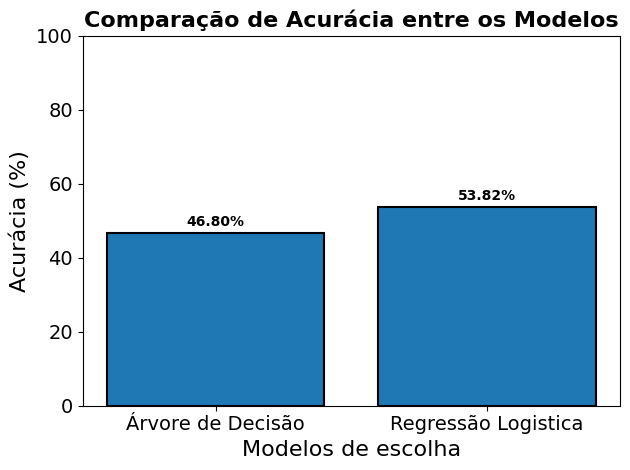

In [99]:
# Fazendo a comparação entre os modelos
acuracias = {
    'Árvore de Decisão': acuracia_ArvoreDecisao * 100,  
    'Regressão Logistica': acuracia_RegLogistic * 100       
} 

barras = plt.bar(acuracias.keys(), acuracias.values(), edgecolor='black', linewidth=1.5)

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 1, f'{yval:.2f}%', va='bottom', ha='center', fontsize=10, color='black', fontweight='bold')

plt.title('Comparação de Acurácia entre os Modelos', fontsize=16, fontweight='bold')
plt.ylabel('Acurácia (%)', fontsize=16)  # Mudando o rótulo para incluir porcentagem
plt.xlabel('Modelos de escolha', fontsize=16)
plt.ylim(0, 100)  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()  
plt.show()